# Chapter 3: Running random simulations in NumPy

## 3.1 - Simulating random coin flips and die rolls using NumPy

In [1]:
# Importing NumPy
import numpy as np

In [2]:
# Simulating a randomly rolled die
die_roll = np.random.randint(1, 7)
assert 1 <= die_roll <= 6

In [3]:
# Seeding reproducible random die rolls
np.random.seed(0)
die_rolls = [np.random.randint(1, 7) for _ in range(3)]
assert die_rolls == [5, 6, 1]

In [4]:
# Simulating one fair coin flip
np.random.seed(0)
coin_flip = np.random.randint(0, 2)
print(f"Coin landed on {'heads' if coin_flip == 1 else 'tails'}")

Coin landed on tails


In [5]:
# Simulating 10 fair coin flips
np.random.seed(0)

def frequency_heads(coin_flip_sequence):
    total_heads = len([head for head in coin_flip_sequence if head == 1])
    return total_heads / len(coin_flip_sequence)

coin_flips = [np.random.randint(0, 2) for _ in range(10)]
freq_heads = frequency_heads(coin_flips)
print(f"Frequency of Heads is {freq_heads}")

Frequency of Heads is 0.8


In [6]:
# Importing Matplotlib
import matplotlib.pyplot as plt

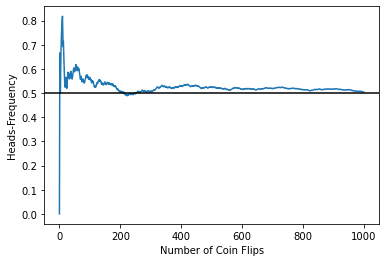

In [7]:
# Plotting simulated fair coin-flip frequencies
np.random.seed(0)
coin_flips = []
frequencies = []
for _ in range(1000):
    coin_flips.append(np.random.randint(0, 2))
    frequencies.append(frequency_heads(coin_flips))

plt.plot(list(range(1000)), frequencies)
plt.axhline(0.5, color="k")
plt.xlabel("Number of Coin Flips")
plt.ylabel("Heads-Frequency")
plt.show()

In [8]:
# Simulating biased coin flips
np.random.seed(0)
print("Let's flip the biased coin once.")
coin_flip = np.random.binomial(1, 0.7)
print(f"Biased coin landed on {'heads' if coin_flip == 1 else 'tails'}.\n")

print("Let's flip the biased coin 10 times.")
number_coin_flips = 10
head_count = np.random.binomial(number_coin_flips, 0.7)
print((f"{head_count} heads were observed out of {number_coin_flips} biased coin flips."))

Let's flip the biased coin once.
Biased coin landed on heads.

Let's flip the biased coin 10 times.
6 heads were observed out of 10 biased coin flips.


In [9]:
# Computing coin-flip-frequency convergence
np.random.seed(0)
head_count = np.random.binomial(1000, 0.7)
frequency = head_count / 1000
print(f"Frequency of Heads is {frequency}")

Frequency of Heads is 0.697


In [10]:
# Recomputing coin-flip-frequency convergence
np.random.seed(0)
assert np.random.binomial(1000, 0.7) / 1000 == 0.697
for i in range(1, 6):
    head_count = np.random.binomial(1000, 0.7)
    frequency = head_count / 1000
    print(f"Frequency at iteration {i} is {frequency}")
    if frequency == 0.7:
        print("Frequency equals the probability!\n")

Frequency at iteration 1 is 0.69
Frequency at iteration 2 is 0.7
Frequency equals the probability!

Frequency at iteration 3 is 0.707
Frequency at iteration 4 is 0.702
Frequency at iteration 5 is 0.699


## 3.2 - Computing confidence intervals using histograms and NumPy arrays

In [11]:
# Computing frequencies with 500 flips per sample
np.random.seed(0)
head_count_list = [np.random.binomial(1000, 0.7) for _ in range(500)]

In [12]:
# Optimizing the coin-flip-frequency computation
np.random.seed(0)
head_count_array = np.random.binomial(1000, 0.7, 500)

In [13]:
# Converting a NumPy array to a Python list
assert head_count_array.tolist() == head_count_list

In [14]:
# Converting a Python list to a NumPy array
new_array = np.array(head_count_list)
assert np.array_equal(new_array, head_count_array)

In [15]:
# Computing frequencies using NumPy
frequency_array = head_count_array / 1000
assert frequency_array.tolist() == [head_count / 1000 for head_count in head_count_list]
assert frequency_array.tolist() == list(map(lambda x: x / 1000, head_count_list))

In [16]:
# Printing a NumPy frequency array
print(frequency_array[:20])

[0.697 0.69  0.7   0.707 0.702 0.699 0.723 0.67  0.702 0.713 0.721 0.689
 0.711 0.697 0.717 0.691 0.731 0.697 0.722 0.728]


In [17]:
# Finding the largest and smallest frequency values
min_freq = frequency_array.min()
max_freq = frequency_array.max()
print(f"Minimum frequency is {min_freq}")
print(f"Maximum frequency is {max_freq}")
print(f"Difference across frequency range: {max_freq - min_freq}")

Minimum frequency is 0.656
Maximum frequency is 0.733
Difference across frequency range: 0.07699999999999996


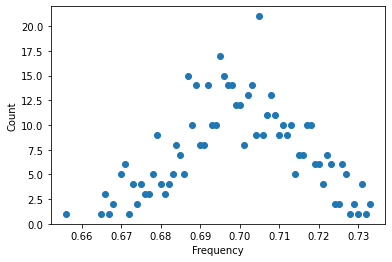

In [18]:
# Plotting measured frequencies
from collections import defaultdict

frequency_counts = defaultdict(int)
for frequency in frequency_array:
    frequency_counts[frequency] += 1

frequencies = list(frequency_counts.keys())
counts = list(frequency_counts.values())

plt.scatter(frequencies, counts)
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

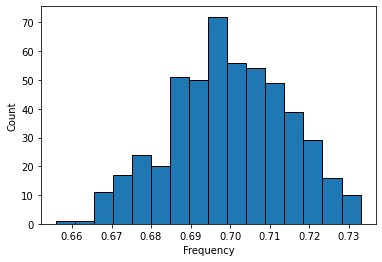

In [19]:
# Plotting a frequency histogram using `plt.hist`
plt.hist(frequency_array, bins="auto", edgecolor="k")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()

Number of Bins: 16


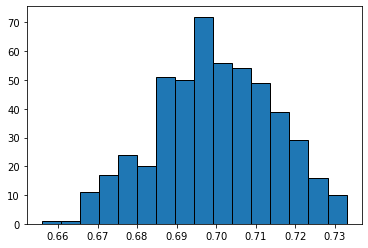

In [20]:
# Counting bins in a plotted histogram
counts, _, _ = plt.hist(frequency_array, bins="auto", edgecolor="k")
print(f"Number of Bins: {counts.size}")

Bin width: 0.004812499999999997


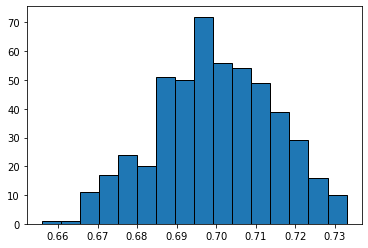

In [21]:
# Finding the width of bins in a histogram
counts, bin_edges, _ = plt.hist(frequency_array, bins="auto", edgecolor="k")

bin_width = bin_edges[1] - bin_edges[0]
assert bin_width == (max_freq - min_freq) / counts.size
print(f"Bin width: {bin_width}")

In [22]:
# Getting a bin's frequency and size
def output_bin_coverage(i):
    count = int(counts[i])
    range_start, range_end, = bin_edges[i], bin_edges[i + 1]
    range_string = f"{range_start} - {range_end}"
    print(f"The bin for frequency range {range_string} contains {count} element{'' if count == 1 else 's'}.")

output_bin_coverage(0)
output_bin_coverage(5)

The bin for frequency range 0.656 - 0.6608125 contains 1 element.
The bin for frequency range 0.6800625 - 0.684875 contains 20 elements.


In [23]:
# Finding the index of an array's maximum value
assert counts[counts.argmax()] == counts.max()

In [24]:
# Using argmax to return a histogram's peak
output_bin_coverage(counts.argmax())

The bin for frequency range 0.6945 - 0.6993125 contains 72 elements.


### 3.2.2 - Deriving probabilities from histograms

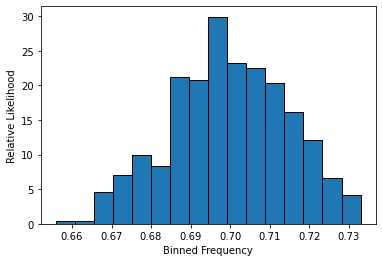

In [25]:
# Plotting a histogram's relative likelihoods
likelihoods, bin_edges, _ = plt.hist(frequency_array, bins="auto", edgecolor="k", density=True)

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

In [26]:
# Computing the total area under a histogram
assert likelihoods.sum() * bin_width == 1

In [27]:
# Computing the probability of the peak frequencies
index = likelihoods.argmax()
area = likelihoods[index] * bin_width
range_start, range_end = bin_edges[index], bin_edges[index + 1]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}.")

Sampled frequency falls within interval 0.6945 - 0.6993125 with probability 0.144.


In [28]:
# Increasing the probability of a frequency range
peak_index = likelihoods.argmax()
start_index, end_index = peak_index - 1, peak_index + 2
area = likelihoods[start_index: end_index + 1].sum() * bin_width
range_start, range_end = bin_edges[start_index], bin_edges[end_index]
range_string = f"{range_start} - {range_end}"
print(f"Sampled frequency falls within interval {range_string} with probability {area}.")

Sampled frequency falls within interval 0.6896875 - 0.704125 with probability 0.464.


In [29]:
# Computing a high confidence interval
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1
        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start} - {range_end}"
    print(f"The frequency range {range_string} represents a {100 * area:.2f}% confidence interval")

    return start_index, end_index

compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.6704375 - 0.723375 represents a 95.40% confidence interval


(3, 14)

### 3.2.3 - Shrinking the range of a high confidence interval

In [30]:
# Sampling 100,000 frequencies
np.random.seed(0)
head_count_array = np.random.binomial(1_000, 0.7, 100_000)
frequency_array = head_count_array / 1_000
assert frequency_array.size == 100_000

The frequency range 0.6704285714285715 - 0.7278571428571429 represents a 95.42% confidence interval


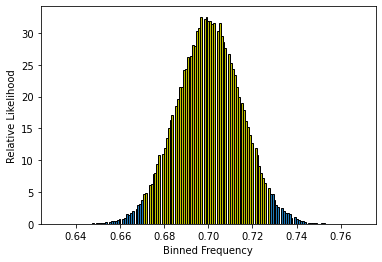

In [31]:
# Coloring histogram bars over an interval
likelihoods, bin_edges, patches = plt.hist(frequency_array, bins="auto", edgecolor="k", density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("y")

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

The frequency range 0.6957690566037736 - 0.7037079245283019 represents a 95.06% confidence interval


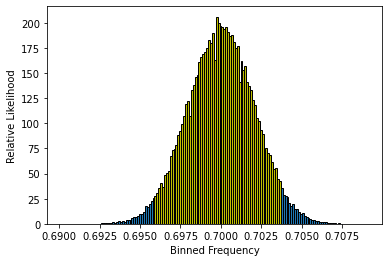

In [32]:
# Sampling 5 billion flipped coins
np.random.seed(0)
head_count_array = np.random.binomial(50_000, 0.7, 100_000)
frequency_array = head_count_array / 50_000

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins="auto", edgecolor="k", density=True)
bin_width = bin_edges[1] - bin_edges[0]
start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor("y")

plt.xlabel("Binned Frequency")
plt.ylabel("Relative Likelihood")
plt.show()

### 3.2.4 - Computing a histogram using `np.histogram`

In [33]:
# Computing a histogram using np.histogram
np.random.seed(0)
likelihoods, bin_edges = np.histogram(frequency_array, bins="auto", density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

The frequency range 0.6957690566037736 - 0.7037079245283019 represents a 95.06% confidence interval


(47, 114)